In [5]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.4 kB 495.5 kB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [9]:
# Load the train data
train_data_file_path = r"C:\Users\aksha\OneDrive\Desktop\Genre Classification Dataset\train_data.txt"
train_data = pd.read_csv(train_data_file_path, delimiter=':::', engine='python', header=None)
train_data.columns = ['ID', 'Title', 'Genre', 'Description']

# Display the first few rows of the dataset
train_data.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


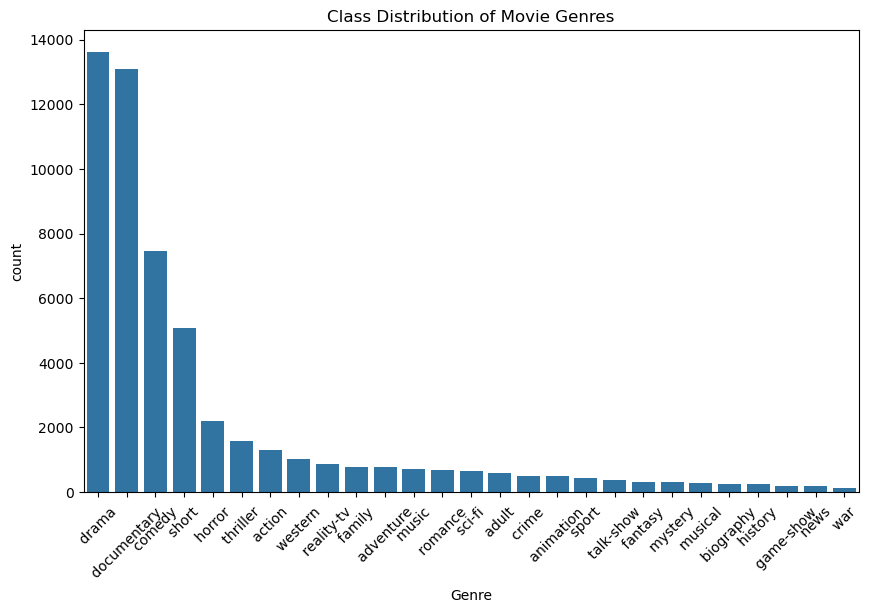

In [11]:
# Plotting the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=train_data, order=train_data['Genre'].value_counts().index)
plt.title('Class Distribution of Movie Genres')
plt.xticks(rotation=45)
plt.show()


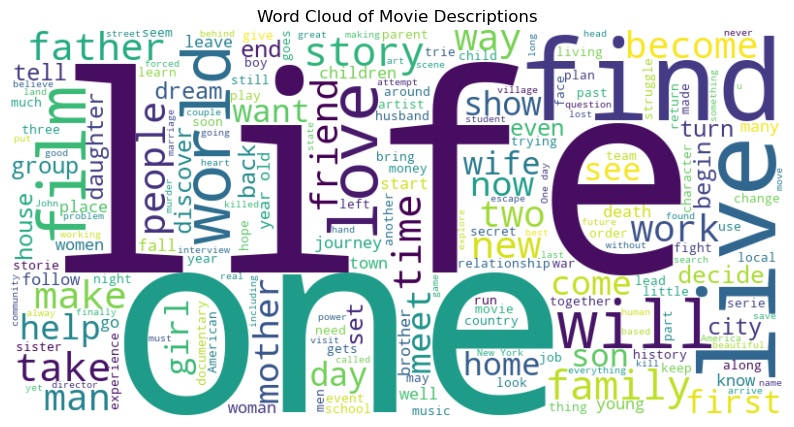

In [13]:
# Generate a word cloud of movie descriptions
all_descriptions = ' '.join(train_data['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode the genres as integers
label_encoder = LabelEncoder()
train_data['Genre_encoded'] = label_encoder.fit_transform(train_data['Genre'])

# Prepare the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(train_data['Description']).toarray()

# The target variable
y = train_data['Genre_encoded']


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy}')
print(classification_report(y_val, y_pred, target_names=label_encoder.classes_))


Validation Accuracy: 0.52310246241815
               precision    recall  f1-score   support

      action        0.57      0.08      0.14       263
       adult        0.88      0.06      0.12       112
   adventure        0.29      0.03      0.05       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.44      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.58      0.88      0.70      2659
       drama        0.46      0.83      0.59      2697
      family        1.00      0.01      0.01       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.15      0.26        40
     history        0.00      0.00      0.00        45
      horror        0.73      0.38      0.50       431
       music        0.79      0.10      0.18       144
     musical        0.00      0.00      0.00        50
     mystery        0.00  

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


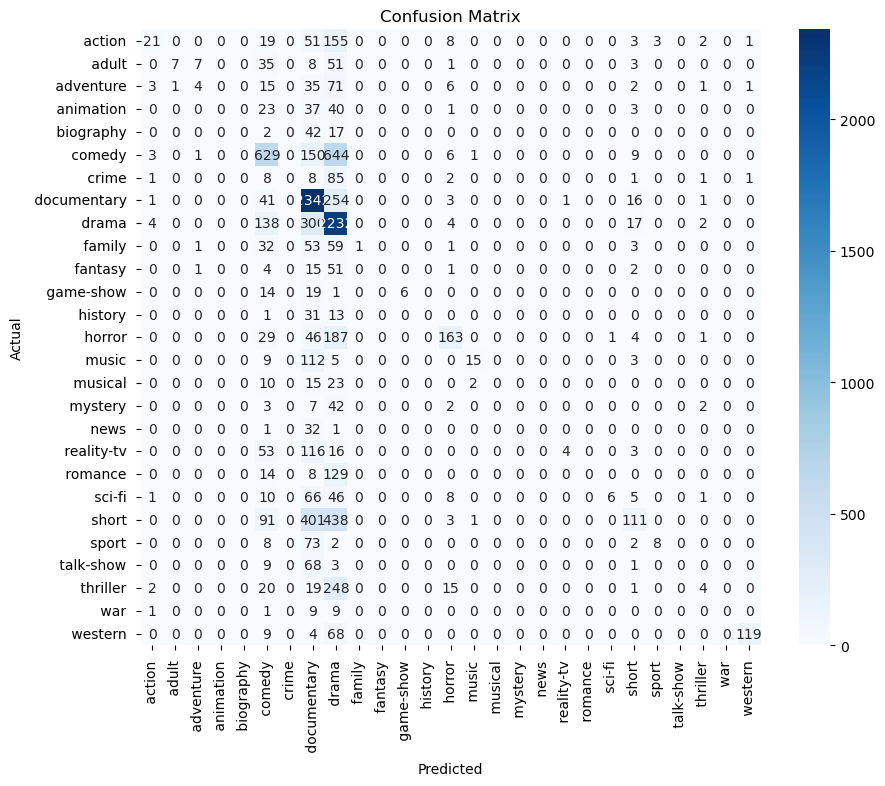

In [19]:
# Confusion matrix visualization
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# Load the test data
test_data_file_path = r"C:\Users\aksha\OneDrive\Desktop\Genre Classification Dataset\test_data.txt"
test_data = pd.read_csv(test_data_file_path, delimiter=':::', engine='python', header=None)
test_data.columns = ['ID', 'Title', 'Description']

# Transform the test data using the same TF-IDF vectorizer
X_test = tfidf.transform(test_data['Description']).toarray()

# Predict the genres
test_predictions = model.predict(X_test)

# Convert the predicted labels back to the original genre names
test_predictions_labels = label_encoder.inverse_transform(test_predictions)

# Add the predictions to the test data and save it
test_data['Predicted_Genre'] = test_predictions_labels
test_data.to_csv('predicted_test_data.csv', index=False)
test_data.head()


,ID,Title,Description,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,drama
